In [39]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
def t_test(data, type):
    data = np.array(data)
    t_value = [6.314, 2.92, 2.353, 2.132, 2.015,1.943, 1.895, 1.860, 1.833, 1.812]
    N = len(data)
    CI_u = data.mean() + t_value[N-2]*data.std()/np.sqrt(N)
    # print(type+" 1-CI_u: ", 1 - CI_u)
    return 1 - CI_u

In [34]:
# change file path here
path = './estimations/'
file_list = os.listdir(path)
print(file_list)
df = pd.DataFrame()
for file in file_list:
    mean = np.loadtxt(path+file+'/'+file+'.txt', delimiter=',')[:,2]
  
    result = []
    for i in range(10):
        E = pd.read_csv(path+file+'/' + file +'_times'+str(i)+'.csv')

        # print(file +'_times'+str(i))

        m = mean[i] 
        epsilon = mean_squared_error(E[' prediction'], E[' label'])
        # print("MSE: ", epsilon)

        C = E.copy()
        C[' prediction'] = m    
        epsilon_C = mean_squared_error(C[' prediction'], C[' label'])
        # print("MSE: ", epsilon_C)
        result.append(epsilon/epsilon_C)

    t_100 = t_test(result, "100%")
    t_75 = t_test(sorted(result)[:int(0.75 * len(result))], "75%")
    t_50 = t_test(sorted(result)[:int(0.5 * len(result))], "50%")
    s = pd.Series({'pair': file, '100%': t_100, '75%': t_75, '50%': t_50})
    df = df.append(s, ignore_index=True)
df

['F_phoneme17_AM13', 'F_phoneme17_AM89', 'F_phoneme31_AM13', 'F_phoneme31_AM89', 'F_phoneme6_AM89']


,pair,100%,75%,50%
0,F_phoneme17_AM13,-0.041598,-0.064156,-0.101969
1,F_phoneme17_AM89,0.133190,0.243726,0.593021
2,F_phoneme31_AM13,-7.228280,-0.371849,-0.162201
3,F_phoneme31_AM89,-2.217705,-0.341401,-0.220949
4,F_phoneme6_AM89,-0.000993,0.000875,0.001876


In [18]:
# Save result
df.to_csv("t_test_result.csv", index=False)

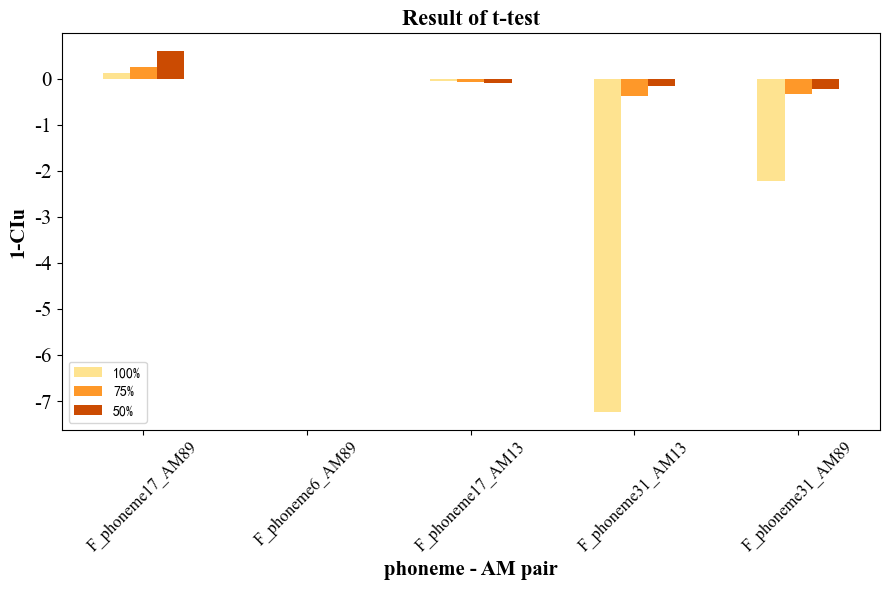

In [66]:
sns.set_palette("YlOrBr", 3)
df.sort_values(by=['50%'], ascending=False).plot(x="pair", y=["100%", "75%", "50%"], kind="bar",figsize=(9,6),title="Result of t-test") 
plt.title("Result of t-test",fontproperties='Times New Roman', fontsize=16,fontweight='bold')
plt.xlabel("phoneme - AM pair",fontproperties='Times New Roman', fontsize=15,fontweight='bold')
plt.ylabel("1-CIu",fontproperties='Times New Roman', fontsize=15,fontweight='bold')

plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=12, rotation=45)
plt.rcParams['font.sans-serif'] = ['KaiTi'] 
plt.rcParams['axes.unicode_minus'] = False  
plt.show()